# Guía para segundo entregable del reto: Motor de Simulación del Movimiento

Clase: F1004B Modelación Computacional del Movimiento

Autor: Edoardo Bucheli

Profesor de Cátedra, Tec de Monterrey Campus Santa Fe

## Parte 1: Trayectoria de un proyectil

En el entregable anterior, obtuvimos la descripción del movimiento del proyectil sin considerar la resistencia del aire. El procedimiento nos llevó a la siguiente expresión,

$\vec{r}(t) = \big(v_{ox}t\big) \vec{i} + \big(-\frac{1}{2}gt^2+v_{oy}t+s_{oy}\big)\vec{j}$

Donde $v_o$ es un vector de velocidad inicial con componentes $v_{ox}$ y $v_{oy}$. 

Podemos obtener estas componentes utilizando un ángulo $\theta$ respecto al eje horizontal,

$v_{ox} = v_o\cos{\theta}$

$v_{oy} = v_o\sin{\theta}$

Empezamos por importar las librerías necesarias

In [94]:
import numpy as np
import matplotlib.pyplot as plt

Ahora definimos los valores iniciales, una vez que termines recuerda utilizar datos conforme a tu investigación del entregable anterior

In [95]:
# Velocidad Inicial
v_0 = 200

# Ángulo en grados
theta_deg = 45

# Altura inicial
y_0 = 5452

# Vector de tiempo. Recuerda que lo puedes generar usando la función np.linspace()

t = np.linspace(0,56, num = 20)

### Calcular la trayectoria sin resistencia del aire

Ya que tenemos nuestros datos principales, podemos crear los arreglos `r_x` y `r_y` que representan las componentes de los vectores de posición. Recuerda que utilizando numpy puedes hacer esto en un solo paso para cada componente.

Haremos esto definiendo una función llamada `proyectile_no_drag()` que tome como argumentos:
* La velocidad inicial en metros sobre segundo
* El ángulo en grados respecto al eje horizontal.
* La altura incial en metros
* Un arreglo con cada valor de tiempo a simular en segundos
* Opcionalmente se puede definir la gravedad pero si no se incluye nada enconces se tomará $9.81 \frac{m}{s^2}$

In [96]:
def proyectile_no_drag(v_0, theta_degree, y_0, t, g = 9.81):
    
    # Ángulo en radianes
    theta_rad = np.radians(theta_degree)
    
    # Componentes de velocidad inicial
    v_0x = v_0*np.cos(theta_rad)
    v_0y = v_0*np.sin(theta_rad)
    
    # Posiciones de x y y en cada paso t
    r_x = v_0x*t
    r_y = -4.9*t**2 + v_0y*t + y_0
    
    return r_x, r_y

### Ejecuta y grafica los resultados

En esto paso correremos la función definida anteriormente,

In [97]:
r_x, r_y = proyectile_no_drag(v_0, theta_deg, y_0,t)

Si hiciste el procedimiento de manera correcta al correr la siguiente celda podrás visualizar la trayectoria.

El código está hecho para graficar la trayectoria formada por los datos propuestos, para tu entrega seguramente querrás cambiar algunos valores para visualizar tu gráfica correctamente. 

Utiliza los comentarios en el código para ayudarte a entender cómo editarlo.

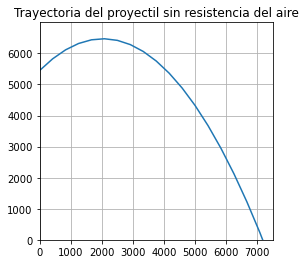

In [98]:
# Hacer una figura con dimensiones de (15 x 4) pixeles.
fig = plt.figure(figsize=(15,4))

# Hacer el gráfico
plt.plot(r_x,r_y)

# Poner una cuadrícula
plt.grid()

# Hacer que los ejes tengan la misma proporción
plt.axis('scaled')

# Poner el título
plt.title("Trayectoria del proyectil sin resistencia del aire")

# Definir el rango del eje x
plt.xlim([0,7500])
# Definir el rango del eje y
plt.ylim([0,7000])

# Definir la ubicación de los ticks (marcadores) del eje x
_ = plt.xticks(np.arange(0,7500,1000))
# Definir la ubicación de los ticks (marcadores) del eje y
_ = plt.yticks(np.arange(0,7000,1000))

## Parte 2: Trayectoria considerando resistencia del aire


##### El problema a resolver
La realidad es que aunque ignoramos la resistencia del aire anteriormente, ésta puede tener un impacto muy fuerte en la trayectoria del proyectil. El problema principal al que nos enfrentamos es que ahora la aceleración no es constante, eso significa que necesitamos una manera de encontrar una manera de describir la aceleración para ambas componentes. Es decir, donde antes supusimos que $a_x = 0$ y $a_y = -g$ en este caso tendremos valores no constantes.

##### Diagrama de cuerpo libre considerando resistencia del aire

Lo primero que necesitamos hacer es definir un diagrama de cuerpo libre del sistema.
<img src="img/dcl_2.png" style="width: 250px;"/>

En la figura podemos observar dos fuerzas afectando este sistema, la primera es el peso del proyectil el cual en la figura aparece como $mg$. Donde $m$ es la masa del proyectil y $g$ es la gravedad.

Por otro lado tenemos el vector de resistencia del aire $\vec{F_D}$. Este vector a su vez se descompone en $F_{Dx}$ y $F_{Dy}$.

Como se puede apreciar en la figura, $\vec{F_D}$ está relacionado con el vector de velocidad $\vec{v}$ esa relación es concretamente la siguiente,

$F_{D} = -Dv\vec{v}$

Es decir que la fuerza de resistencia del aire es igual a una constante $D$ que depende del problema específico (describiremos $D$ muy pronto) y el producto escalar entre la magnitud de la velocidad, $v$ y el vector de velocidad $\vec{v}$.

$F_D$ a su vez se descompone de la siguiente manera,

* $F_{Dx} = -Dvv_x$
* $F_{Dy} = -Dvv_y$

$D$ se describe de la siguiente manera,

$D = \frac{CA\rho}{2}$

Dónde,

* $C$ es el coeficiente de arrastre, este depende del material del proyectil y su forma.
* $A$ es el área frontal del proyectil.
* $\rho$ es la densidad del aire.

Cabe señalar que aunque la velocidad aparece en este diagrama de cuerpo libre, no es una fuerza que se ejerce sobre el proyectil por lo que no se incluye dentro de los cálculos que vamos a realizar.

##### Segunda Ley de Newton

Utilizando la **Segunda Ley de Newton** obtenemos las siguientes ecuaciones,

* $\sum F_x = -Dvv_x = ma_x$
* $\sum F_y = -mg - Dvv_y = ma_y$

Y si despejamos la aceleración en ambas obtenemos,

* $a_x = -\frac{D}{m}vv_x$
* $a_x = -g - \frac{D}{m}vv_y$

Lo que significa que en cualquier punto podemos obener la aceleración siempre y cuando tengamos la velocidad.

##### Aproximando el resultado

El único problema con nuestras expresiones de la aceleración es que no son funciones del tiempo, por lo que para resolver el problema necesitamos aproximar cada paso en el tiempo, uno por uno.

Es decir, empezaremos definiendo una posición ($\vec{s}$) y velocidad ($\vec{v}$) iniciales, de ahí calcularemos la aceleración ($\vec{a}$) utilizando nuestras ecuaciones de la sección anterior. Podemos entonces ir encontrando uno por uno cada uno de estos valores para puntos más adelante en el tiempo.

Para expresar esto matemáticamente necesitamos definir una $\Delta t$, este valor nos dice de qué tamaño es el salto que tomamos en el tiempo para encontrar la posición, velocidad y aceleración siguiente.

Es decir, si $\Delta t = 1$ y empezamos en $t = 0$ entonces los valores iniciales de $\vec{s}$, $\vec{v}$ y $\vec{a}$ corresponden al tiempo 0. De ahí, como $\Delta t$ es igual a 1 entonces calcularemos la nueva posición, velocidad y aceleración en el tiempo $t=1$, de ahí para el tiempo $t=2$, etc.

Si en lugar de eso utilizamos $\Delta t = 0.1$ entonces primero calcularemos $\vec{s}$, $\vec{v}$ y $\vec{a}$ para el tiempo 0 pero el siguiente paso será $\vec{s}$, $\vec{v}$ y $\vec{a}$ para el tiempo $t=0.1$, de ahí para el tiempo $t=0.2$, etc.

Lo bueno es que podemos usar las ecuaciones cinemáticas de posición y velocidad que discutimos durante la primera sección, pero tendremos que adaptarlas de manera muy ligera para nuestros usos actuales.

$\vec{s}(t + \Delta t) = \vec{s}(t) + \vec{v}(t)\Delta t + \frac{1}{2}\vec{a}(t)(\Delta t)^2$

Donde $\vec{s}(t), \vec{v}(t), \vec{a}(t)$ son correspondientemente la posición, velocidad y aceleración de la partícula en el tiempo $t$ y $\Delta t$ es el incremento de tiempo de un paso a otro.

Recuerda que como estamos hablando de vectores necesitaremos separar por componentes, en este caso eso es fácil y queda de la siguiente forma,

* $s_x(t + \Delta t) = s_x(t) + v_x(t)\Delta t + \frac{1}{2}a_x(t)(\Delta t)^2$
* $s_y(t + \Delta t) = s_y(t) + v_y(t)\Delta t + \frac{1}{2}a_y(t)(\Delta t)^2$

Por último podemos aproximar la velocidad nueva con la expresión,

$\vec{v}(t+\Delta t) = \vec{v} + \vec{a}\Delta t$

El cual por componentes se define como,

* $v_x(t+\Delta t) = v_x + a_x\Delta t$
* $v_y(t+\Delta t) = v_y + a_y\Delta t$

##### Algoritmo para calcular trayectoria con resistencia del aire

1. Definir las constantes, $m$, $rho$, $C$, $A$ y $\Delta t$ dependiendo del problema
1. Definir los valores iniciales $y_0$, $v_0$, $\theta$
1. Definir el número de iteraciones $N$ del algoritmo, puedes decidir la estrateguia que prefieras.
1. Encontrar la aceleración inicial con $a_x = -\frac{D}{m}vv_x$ y $a_y = -g-\frac{D}{m}vv_y$.
1. Repetir los pasos 6-9 $N$ veces
1. Calcular $\vec{v}(t+\Delta t) = \vec{v}+\vec{a}\Delta t$
1. Calcular $\vec{s}(t+\Delta t) = \vec{s}+\vec{v}\Delta t+\frac{1}{2}\vec{a}\Delta t^2$
1. Calcular $a_x(t+\Delta t) = -\frac{D}{m}vv_x$
1. Calcular $a_y(t+\Delta t)= -g-Dvv_y$
1. Fin

Para iniciar, escribe los valores relevantes para el objeto, nuevamente, aquí proponemos valores para que revises tu código pero una vez que esté listo deberás cambiarlos a valores que tengan que ver con el reto.

In [176]:
# Masa en kg
m = 100
# Densidad del Aire
rho = 0.94
# Coeficiente de arrastre
C = 0.6
# Radio de la pelota
r = .2
# Área de la pelota
A = np.pi*r**2
# Delta t
dt = 0.1
# Iteraciones
N = 10000

Como calentiamiento para este paso, tendrás que calcular la constante $D$, recuerda que ésta se define de la siguiente manera,

$D = \frac{\rho \cdot C\cdot A}{2}$

In [177]:
D = (rho*C*A)/2
D

0.035437165132492864

### Definir valores iniciales

Ahora que tenemos todos los datos iniciales empezaremos por definir todos los valores iniciales a utilizar, notarás que estamos creando listas para las componentes de posición, velocidad y aceleración. Hacemos esto para guardar un registro de cada uno de estos valores en todos los tiempos $t$ que evaluemos, de otra forma perderíamos esos valores.

In [178]:
def proyectile_with_drag(v_0, theta_deg, y_0, m, D, dt, N, g=9.81):
    
    # Ángulo en radianes
    theta_rad = np.radians(theta_deg)
    
    # Componentes de velocidad inicial
    v_0x = v_0*np.cos(theta_rad)
    v_0y = v_0*np.sin(theta_rad)
    
    # Tiempo
    t = 0
    t_list = [t]

    # Velocidad
    v = v_0
    v_x = v_0x
    v_y = v_0y

    v_list = [v]
    v_x_list = [v_0x]
    v_y_list = [v_0y]

    # Posición
    x = 0
    y = y_0

    x_list = [x]
    y_list = [y]

    # Calcula la aceleración inicial
    a_x = -(D/m)*v*v_x
    a_y = -g-(D/m)*v*v_y

    a_x_list = [a_x]
    a_y_list = [a_y]
    
    for i in range(N):
            
        # Calcular las velocidades para 'x' y 'y' del siguiente paso
        v_x_next = v_x + (a_x) * dt
        v_y_next = v_y + (a_y) * dt
        
        # Calcular la magnitud del vector de velocidad, en otras palabras, queremos encontrar
        # la magnitud del vector cuyas componentes son v_x_next y v_y_next
        v_next = np.sqrt((v_x_next)**2 + (v_y_next)**2)

        # Agrega los valores calculados a las listas v_list, v_x_list, v_y_list. Puedes hacer
        # esto con .append()
        v_list.append(v_next)
        v_x_list.append(v_x_next)
        v_y_list.append(v_y_next)

        # Calcula las posiciones 'x' y 'y' del siguiente paso
        x_next = x + v_x_next * dt + (1/2)* a_x*(dt**2)
        y_next = y + v_y_next * dt + (1/2)*a_y*(dt**2)
        
        # Agrega los valores calculados a las listas x_list y y_list
        x_list.append(x_next)
        y_list.append(y_next)
        
        # Calcula las aceleraciones para 'x' y 'y' del siguiente paso
        a_x_next = -(D/m)*v*v_x_next
        a_y_next = -g-(D/m)*v*v_y_next

        # Agrega los valores calculados a las listas a_x_list y a_y_list
        a_x_list.append(a_x_next)
        a_y_list.append(a_y_next)

        
        # Como ya terminamos esta iteración, hagamos que lo que calculamos como _next
        # sea el paso actual en la siguiente iteración. Por claridad, el primer
        # ejemplo se encuentra resuelto. Haz lo mismo con los demás.
        
        v_x = v_x_next
        v_y = v_y_next
        v = v_next

        x = x_next
        y = y_next

        a_x = a_x_next
        a_y = a_y_next

        # Calcula el tiempo y guárdalo en la lista t_list
        t += dt
        t_list.append(t)
        
    return x_list, y_list, v_list, v_x_list, v_y_list, a_x_list, a_y_list, t_list

In [179]:
[x_list, y_list, v_list, v_x_list, 
 v_y_list, a_x_list, a_y_list, t_list] = proyectile_with_drag(v_0, theta_deg, y_0, m, D, dt, N)

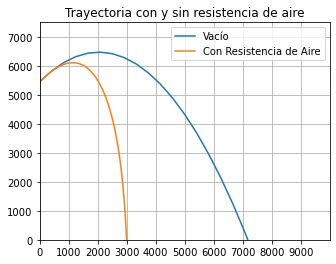

In [180]:
# Hacer una figura con dimensiones de (15 x 4) pixeles.
fig = plt.figure(figsize=(15,4))

# Hacer el gráfico
plt.plot(r_x,r_y, label="Vacío")
plt.plot(x_list,y_list, label="Con Resistencia de Aire")

# Poner una cuadrícula
plt.grid()

# Hacer que los ejes tengan la misma proporción
plt.axis('scaled')

# Poner el título del gráfico
plt.title("Trayectoria con y sin resistencia de aire")

# Definir el rango del eje x
plt.xlim([0, 10000])
# Definir el rango del eje y
plt.ylim([0,7500])

# Definir la ubicación de los ticks (marcadores) del eje x
_ = plt.xticks(np.arange(0,10000,1000))
# Definir la ubicación de los ticks (marcadores) del eje y
_ = plt.yticks(np.arange(0,7500,1000))

# Poner una leyenda para identificar a qué simulación corresponde cada línea
_ = plt.legend()

In [9]:
[x_list, y_list, v_list, v_x_list, 
 v_y_list, a_x_list, a_y_list, t_list] = proyectile_with_drag(v_0, theta_deg, y_0, m, D, dt, N)

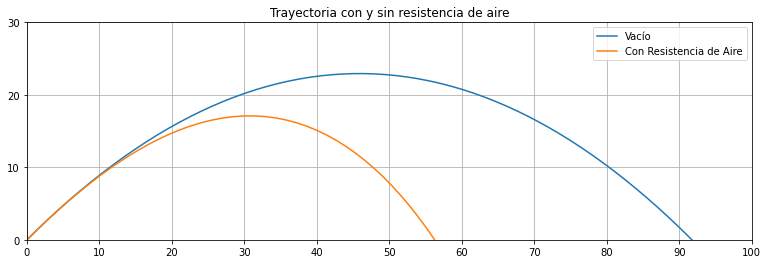

In [10]:
# Hacer una figura con dimensiones de (15 x 4) pixeles.
fig = plt.figure(figsize=(15,4))

# Hacer el gráfico
plt.plot(r_x,r_y, label="Vacío")
plt.plot(x_list,y_list, label="Con Resistencia de Aire")

# Poner una cuadrícula
plt.grid()

# Hacer que los ejes tengan la misma proporción
plt.axis('scaled')

# Poner el título del gráfico
plt.title("Trayectoria con y sin resistencia de aire")

# Definir el rango del eje x
plt.xlim([0,100])
# Definir el rango del eje y
plt.ylim([0,30])

# Definir la ubicación de los ticks (marcadores) del eje x
_ = plt.xticks(np.arange(0,101,10))
# Definir la ubicación de los ticks (marcadores) del eje y
_ = plt.yticks(np.arange(0,31,10))

# Poner una leyenda para identificar a qué simulación corresponde cada línea
_ = plt.legend()

Lo logramos! Si seguiste los pasos de manera correcta ahora tienes el código para simular un tiro parabólico considerando la resistencia del aire.

Ahora necesitas probar con valores reales basados en el reto.

Una recomendación que te puedo hacer es no solo graficar las posiciones de x contra las posiciones de y. Por ejemplo puede valer la pena graficar el tiempo contra cada posición, o el tiempo contra cada aceleración. Incluiré unos ejemplos simples.

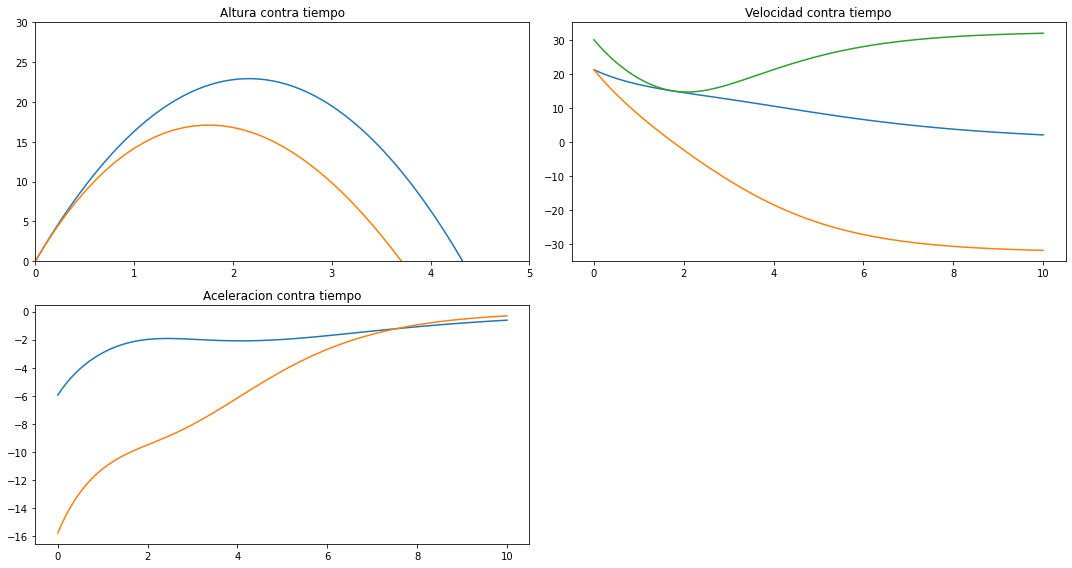

In [11]:
fig = plt.figure(figsize = (15,8))

plt.subplot(2,2,1)

plt.plot(t,r_y,label="Vacio")
plt.plot(t_list,y_list,label="Con Resistencia de Aire")
plt.title("Altura contra tiempo")
plt.xlim([0,5])
_ = plt.ylim([0,30])

plt.subplot(2,2,2)

plt.plot(t_list,v_x_list,label="v_x")
plt.plot(t_list,v_y_list,label="v_y")
plt.plot(t_list,v_list,label="v")
plt.title("Velocidad contra tiempo")

plt.subplot(2,2,3)

plt.plot(t_list,a_x_list,label="a_x")
plt.plot(t_list,a_y_list,label="a_y")
plt.title("Aceleracion contra tiempo")

plt.tight_layout()

### Volcanes

Por último, encontré este recurso con un poco de ayuda para valores específicos del reto

https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2017RG000564